In [1]:
import pandas as pd

In [2]:
df_fields = pd.read_csv('../data/fields.csv', delimiter=';', decimal=',', skiprows=[0, 2])
df_value = pd.read_csv('../data/value.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['inv_item_date'], date_format={'inv_item_date': '%d.%m.%Y'})
df_works = pd.read_csv('../data/works.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['start_date', 'end_date'], date_format={'start_date': '%d.%m.%Y', 'end_date': '%d.%m.%Y'})

df_works['area'] = df_works['area'].str.replace(',', '.').astype(float)

In [3]:
df_fields.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,Unnamed: 18
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,221.05,206.3,4.05,5.25,NaN
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,221.05,206.3,4.05,5.25,NaN
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,199.80,186.0,3.50,5.20,NaN
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,186.50,174.8,5.90,5.40,NaN
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,166.60,147.9,5.60,5.40,NaN


In [5]:
df_works.isnull().sum()

season                0
field                 0
work_type             0
work_subtype          0
start_date            0
end_date           9004
area                  0
main_tech             0
add_tech          48540
mech                  0
proc_depth       132562
prod_purpose     140822
prod_weight           0
Unnamed: 13           0
Unnamed: 14           0
prod_dry_perc    161715
prod_humid       151128
prod_impur       151128
yield_fact            0
work_id               0
dtype: int64

In [6]:
df_works['work_subtype'].unique()

array(['Боронование', 'Дискование', 'Вспашка', 'Обработка СЗР',
       'Культивация', 'Внесение СЗР и удобрений', 'Прикатывание',
       'Внесение органических удобрений',
       'Внесение жидких органических удобрений',
       'Внесение минеральных удобрений', 'Сев с внесением удобрений',
       'Глубокорыхление', 'Сев без внесения удобрений', 'Мульчирование',
       'Уборка трав', 'Дератизация', 'Прессование', 'Уборка камней',
       'Сгребание в валки', 'Вывоз', 'Кошение', 'Подбор (корм)',
       'Междурядная обработка без внесения', 'Ворошение',
       'Уборка силос/карнаж', 'Подбор', 'Заготовка сенажа',
       'Подбор и обмолот', 'Прямое комбайнирование',
       'Вывоз (тех.культуры)', 'Копка'], dtype=object)

In [7]:
valid_work_subtypes = ['Прямое комбайнирование', 'Подбор и обмолот', 'Заготовка сенажа', 'Уборка силос/карнаж', 'Подбор (корм)', 'Вывоз', 'Прессование']
df_yield_fact = df_works.query(f"work_type == 'Уборка' and work_subtype in {valid_work_subtypes}")[['season', 'field', 'yield_fact', 'area']]
df_yield_fact = df_yield_fact.groupby(by=['field', 'season']).mean().reset_index()

df_yield_fact.head()

,field,season,yield_fact,area
0,02.09.02.002.01,2023,1.56750,30.0625
1,02.09.02.002.01,2024,0.00000,24.0500
2,02.09.02.015.00,2023,1.22875,4.5425
3,02.09.02.019.00,2023,2.15000,50.7800
4,02.09.03.032.00,2023,104.07200,10.5420


In [8]:
df_fields_tmp = df_fields[['season', 'field', 'p2o5', 'k2o', 'humus', 'ph', 'crop', 'yield_plan']]
df_fields_tmp.head()

,season,field,p2o5,k2o,humus,ph,crop,yield_plan
0,2023,22.47.01.001.01,221.05,206.3,4.05,5.25,Оз.пшеница мягкая,3.8
1,2023,22.47.01.001.02,221.05,206.3,4.05,5.25,Пар,NaN
2,2023,22.47.01.002.00,199.80,186.0,3.50,5.20,Пар,NaN
3,2023,22.47.01.003.00,186.50,174.8,5.90,5.40,Оз.пшеница мягкая,3.8
4,2023,22.47.01.004.00,166.60,147.9,5.60,5.40,Оз.пшеница мягкая,3.8


In [9]:
df = df_fields_tmp.merge(df_yield_fact, how='left', on=['field', 'season'])
df = df.dropna()

df.head()

,season,field,p2o5,k2o,humus,ph,crop,yield_plan,yield_fact,area
0,2023,22.47.01.001.01,221.05,206.3,4.05,5.25,Оз.пшеница мягкая,3.8,194.510000,20.414667
3,2023,22.47.01.003.00,186.50,174.8,5.90,5.40,Оз.пшеница мягкая,3.8,2.152083,26.468750
4,2023,22.47.01.004.00,166.60,147.9,5.60,5.40,Оз.пшеница мягкая,3.8,1.564815,19.973333
7,2023,22.47.01.006.02,194.70,195.9,4.00,5.15,Оз.пшеница мягкая,3.8,2.098889,7.036667
9,2023,22.47.01.007.02,184.20,171.4,4.40,5.05,Оз.пшеница мягкая,3.8,2.251429,12.221429


In [10]:
df.shape

(7324, 10)

In [30]:
import matplotlib.pyplot as plt

In [32]:
def remove_outliers_iqr(df, column, k = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

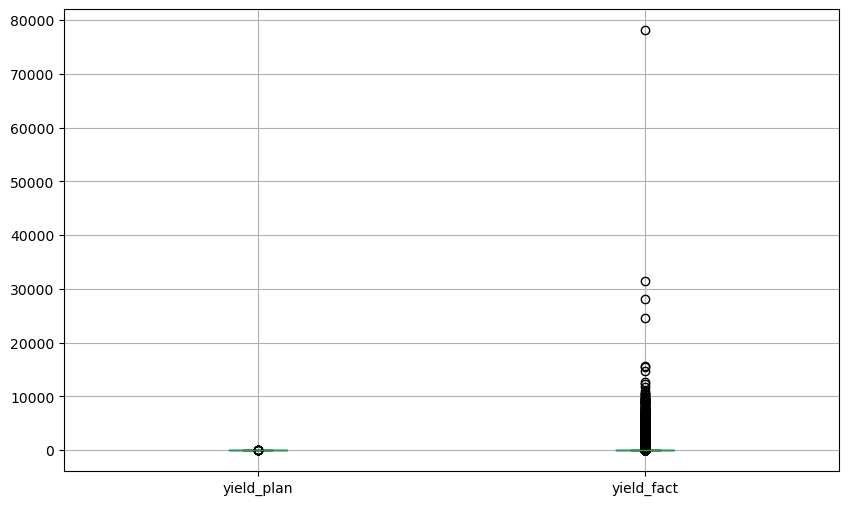

In [33]:
df.boxplot(column=['yield_plan', 'yield_fact'], figsize=(10, 6))

plt.show()

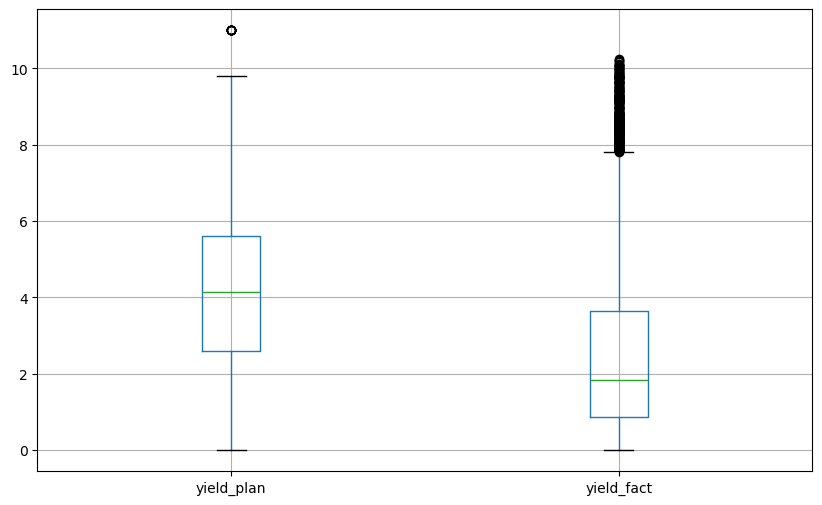

In [16]:
cleaned_df = remove_outliers_iqr(df, 'yield_fact', k=1.5)

cleaned_df.boxplot(column=['yield_plan', 'yield_fact'], figsize=(10, 6))

plt.show()

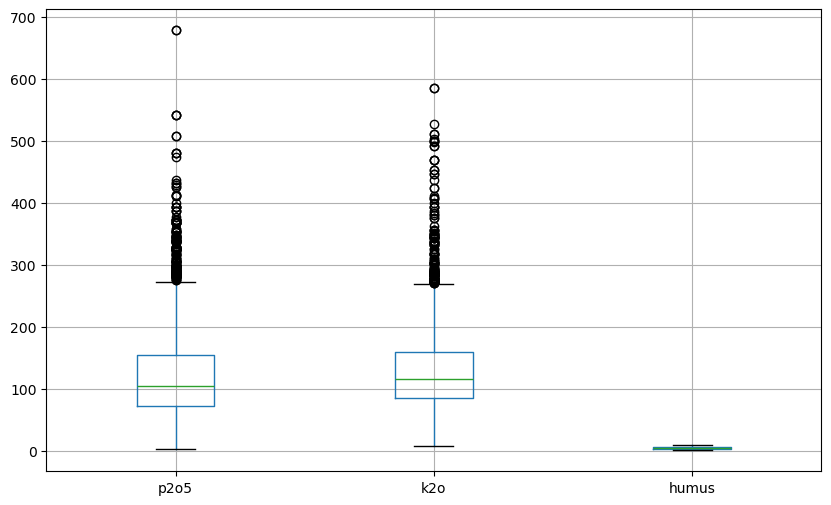

In [17]:
cleaned_df.boxplot(column=['p2o5', 'k2o', 'humus'], figsize=(10, 6))
plt.show()

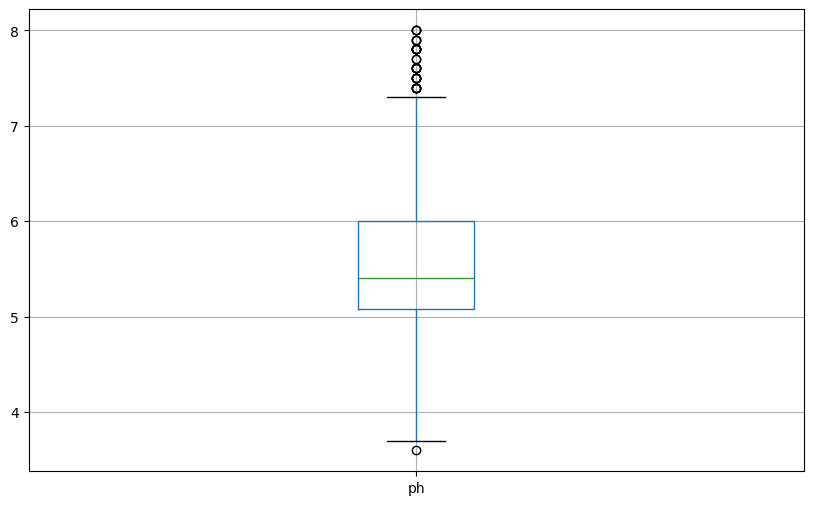

In [18]:
cleaned_df.boxplot(column='ph', figsize=(10, 6))

plt.show()

In [19]:
import seaborn as sns

In [20]:
cleaned_df.head()

,season,field,p2o5,k2o,humus,ph,crop,yield_plan,yield_fact,area
3,2023,22.47.01.003.00,186.5,174.8,5.9,5.40,Оз.пшеница мягкая,3.8,2.152083,26.468750
4,2023,22.47.01.004.00,166.6,147.9,5.6,5.40,Оз.пшеница мягкая,3.8,1.564815,19.973333
7,2023,22.47.01.006.02,194.7,195.9,4.0,5.15,Оз.пшеница мягкая,3.8,2.098889,7.036667
9,2023,22.47.01.007.02,184.2,171.4,4.4,5.05,Оз.пшеница мягкая,3.8,2.251429,12.221429
10,2023,22.47.01.008.00,249.0,151.5,3.7,5.20,Оз.пшеница мягкая,3.8,2.030000,32.320000


In [21]:
cleaned_df[['p2o5', 'k2o', 'humus', 'ph', 'yield_plan', 'yield_fact', 'area']].corr()

,p2o5,k2o,humus,ph,yield_plan,yield_fact,area
p2o5,1.000000,0.461871,0.052537,0.056082,-0.097345,-0.028170,0.023786
k2o,0.461871,1.000000,0.361322,0.107925,-0.130239,-0.015461,0.090213
humus,0.052537,0.361322,1.000000,0.458152,-0.190654,-0.084453,0.028065
ph,0.056082,0.107925,0.458152,1.000000,-0.055555,-0.047435,-0.112839
yield_plan,-0.097345,-0.130239,-0.190654,-0.055555,1.000000,0.680689,-0.027159
yield_fact,-0.028170,-0.015461,-0.084453,-0.047435,0.680689,1.000000,-0.058573
area,0.023786,0.090213,0.028065,-0.112839,-0.027159,-0.058573,1.000000


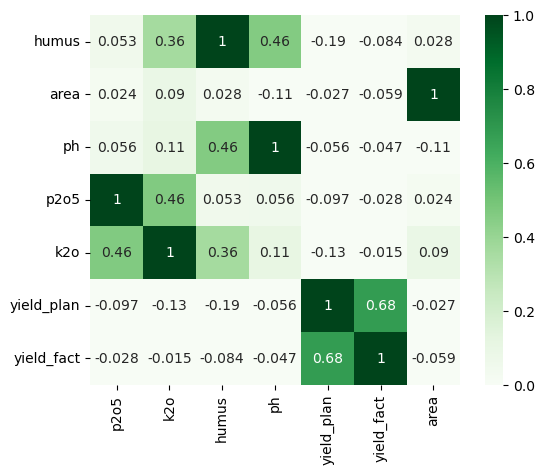

In [22]:
corrs = cleaned_df[['p2o5', 'k2o', 'humus', 'ph', 'yield_plan', 'yield_fact', 'area']].corr().round(3).sort_values('yield_fact')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0,
            annot=True)
plt.show()

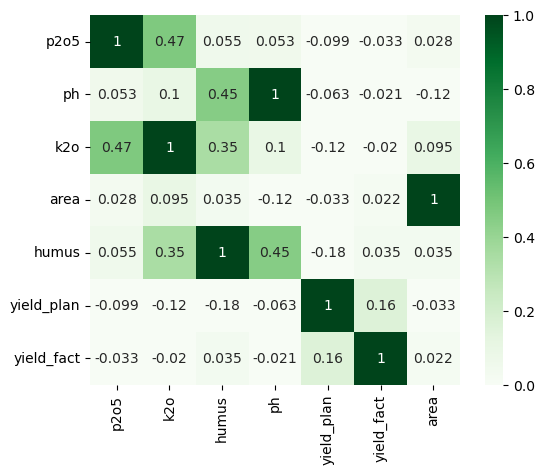

In [35]:
corrs = df[['p2o5', 'k2o', 'humus', 'ph', 'yield_plan', 'yield_fact', 'area']].corr().round(3).sort_values('yield_fact')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0,
            annot=True)
plt.show()

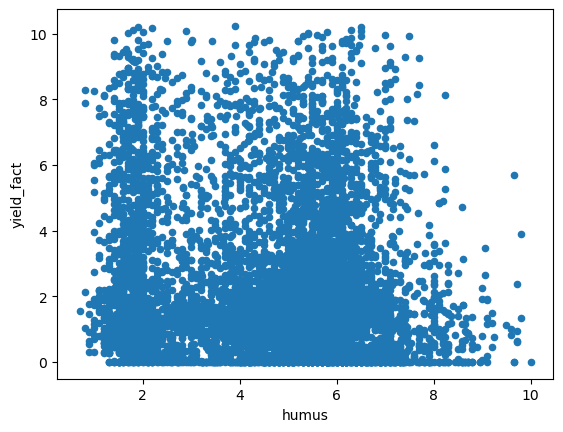

In [29]:
cleaned_df[['humus', 'yield_fact']].plot(kind='scatter', x='humus', y='yield_fact')

plt.show()

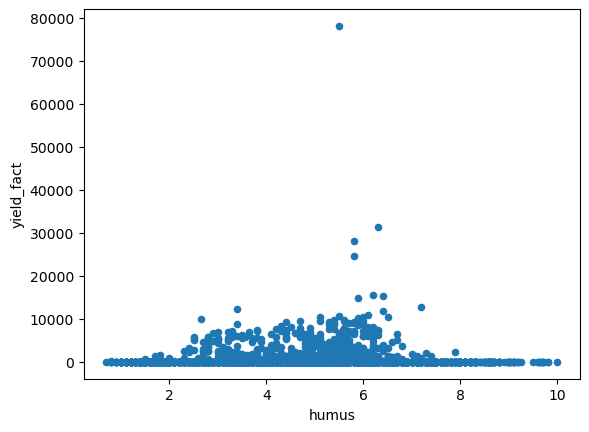

In [34]:
df[['humus', 'yield_fact']].plot(kind='scatter', x='humus', y='yield_fact')

plt.show()